In [2]:
import pandas as pd
import numpy as np
import dateutil
import ipympl
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
#!pip install ipympl

In [4]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_column', None)
#Aesthetics
sns.set_style("darkgrid")
%matplotlib inline
# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

In [5]:
tel=pd.read_csv(r'C:\Users\Jakinda\Documents\Python Scripts\10Academy\Telecom_analysis\data\Week1_challenge_data_source(CSV).csv')
tel.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,NaN,NaN,NaN,NaN,NaN,NaN,213.0,214.0,1545765.0,24420.0,1634479.0,1271433.0,3563542.0,137762.0,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),NaN,NaN,NaN,NaN,NaN,NaN,971.0,1022.0,1926113.0,7165.0,3493924.0,920172.0,629046.0,308339.0,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),NaN,NaN,NaN,NaN,NaN,NaN,751.0,695.0,1684053.0,42224.0,8535055.0,1694064.0,2690151.0,672973.0,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,NaN,NaN,44.0,44.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,3330.0,37882.0,1.321510e+09,undefined,undefined,NaN,NaN,NaN,NaN,NaN,NaN,17.0,207.0,644121.0,13372.0,9023734.0,2788027.0,1439754.0,631229.0,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,NaN,NaN,6.0,9.0,NaN,NaN,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,NaN,NaN,NaN,NaN,NaN,NaN,607.0,604.0,862600.0,50188.0,6248284.0,1500559.0,1936496.0,173853.0,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
def format_float(value):
    return f'{value:,.2f}'
def convert_bytes_to_megabytes(df, bytes_data):
    """
        This function takes the dataframe and the column which has the bytes values
        returns the megabytesof that value
        
        Args:
        -----
        df: dataframe
        bytes_data: column with bytes values
        
        Returns:
        --------
        A series
    """
    
    megabyte = 1*10e+5
    df[bytes_data] = df[bytes_data] / megabyte
    return df[bytes_data]

def total_column(col_1,col_2):
    new_col = col_1+col_2
    return new_col 

def fix_outlier(df, column):
    df[column] = np.where(df[column] > df[column].quantile(0.95), df[column].median(),df[column])
    
    return df[column]

def find_agg(df:pd.DataFrame, agg_column:str, agg_metric:str, col_name:str, top:int, order=False )->pd.DataFrame:
    
    new_df = df.groupby(agg_column)[agg_column].agg(agg_metric).reset_index(name=col_name).\
                        sort_values(by=col_name, ascending=order)[:top]
    
    return new_df
pd.options.display.float_format = format_float

In [7]:
# how many missing values exist or better still what is the % of missing values in the dataset?
def percent_missing(df):

    # Calculate total number of cells in dataframe
    totalCells = np.product(df.shape)

    # Count number of missing values per column
    missingCount = df.isnull().sum()

    # Calculate total number of missing values
    totalMissing = missingCount.sum()

    # Calculate percentage of missing values
    print("The telecom dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")

percent_missing(tel)

The telecom dataset contains 12.5 % missing values.


In [8]:
tel.isna().sum()

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

In [9]:
# drop columns with more than 30% missing values
NA_val = tel.isna().sum()
def na_filter(na, threshold = .3): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/tel.shape[0]<threshold:
            col_pass.append(i)
    return col_pass
tel = tel[na_filter(NA_val)]

In [10]:
tel.isna().sum()

Bearer Id                           991
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                 1153
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [11]:
tel=tel.drop(['Avg RTT DL (ms)','Avg RTT UL (ms)','Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)','DL TP < 50 Kbps (%)','50 Kbps < DL TP < 250 Kbps (%)','250 Kbps < DL TP < 1 Mbps (%)','DL TP > 1 Mbps (%)','UL TP < 10 Kbps (%)','10 Kbps < UL TP < 50 Kbps (%)','50 Kbps < UL TP < 300 Kbps (%)','UL TP > 300 Kbps (%)','Nb of sec with Vol DL < 6250B','Nb of sec with Vol UL < 1250B'],axis=1, inplace = False)

In [12]:
tel = tel.dropna()

In [13]:
tel['Social_media_total']= total_column(tel['Social Media DL (Bytes)'],tel['Social Media UL (Bytes)'])
tel['Google_total']= total_column(tel['Google DL (Bytes)'],tel['Google UL (Bytes)'])
tel['Email_total']= total_column(tel['Email DL (Bytes)'],tel['Email UL (Bytes)'])
tel['Youtube_total']= total_column(tel['Youtube DL (Bytes)'],tel['Youtube UL (Bytes)'])
tel['Netflix_total']= total_column(tel['Netflix DL (Bytes)'],tel['Netflix UL (Bytes)'])
tel['Gaming_total']= total_column(tel['Gaming DL (Bytes)'],tel['Gaming UL (Bytes)'])
tel['Other_total']= total_column(tel['Other DL (Bytes)'],tel['Other UL (Bytes)'])
tel['total']= total_column(tel['Total DL (Bytes)'],tel['Total UL (Bytes)'])

In [14]:
tel['Social_media_total']=convert_bytes_to_megabytes(tel,'Social_media_total')
tel['Google_total']=convert_bytes_to_megabytes(tel,'Google_total')
tel['Email_total']=convert_bytes_to_megabytes(tel,'Email_total')
tel['Youtube_total']=convert_bytes_to_megabytes(tel,'Youtube_total')
tel['Netflix_total']=convert_bytes_to_megabytes(tel,'Netflix_total')
tel['Gaming_total']=convert_bytes_to_megabytes(tel,'Gaming_total')
tel['Other_total']=convert_bytes_to_megabytes(tel,'Other_total')
tel['total']=convert_bytes_to_megabytes(tel,'total')

In [15]:
tel.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
0,"13,114,483,460,844,900,352.00",4/4/2019 12:01,770.00,4/25/2019 14:35,662.00,"1,823,652.00","208,201,448,079,117.00","33,664,962,239.00","35,521,209,507,511.00",9.16456699548519E+015,"37,624.00","38,787.00","1,823,652,892.00",Samsung,Samsung Galaxy A5 Sm-A520F,"1,545,765.00","24,420.00","1,634,479.00","1,271,433.00","3,563,542.00","137,762.00","15,854,611.00","2,501,332.00","8,198,936.00","9,656,251.00","278,082,303.00","14,344,150.00","171,744,450.00","8,814,393.00","36,749,741.00","308,879,636.00",1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,"13,114,483,482,878,900,224.00",4/9/2019 13:04,235.00,4/25/2019 8:15,606.00,"1,365,104.00","208,201,909,211,140.00","33,681,854,413.00","35,794,009,006,359.00",L77566A,168.00,"3,560.00","1,365,104,371.00",Samsung,Samsung Galaxy J5 (Sm-J530),"1,926,113.00","7,165.00","3,493,924.00","920,172.00","629,046.00","308,339.00","20,247,395.00","19,111,729.00","18,338,413.00","17,227,132.00","608,750,074.00","1,170,709.00","526,904,238.00","15,055,145.00","53,800,391.00","653,384,965.00",1.93,4.41,0.94,39.36,35.57,609.92,541.96,707.19
2,"13,114,483,484,080,500,736.00",4/9/2019 17:42,1.00,4/25/2019 11:58,652.00,"1,361,762.00","208,200,314,458,056.00","33,760,627,129.00","35,281,510,359,387.00",D42335A,0.00,0.00,"1,361,762,651.00",Samsung,Samsung Galaxy A8 (2018),"1,684,053.00","42,224.00","8,535,055.00","1,694,064.00","2,690,151.00","672,973.00","19,725,661.00","14,699,576.00","17,587,794.00","6,163,408.00","229,584,621.00","395,630.00","410,692,588.00","4,215,763.00","27,883,638.00","279,807,335.00",1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,"13,114,483,485,442,799,616.00",4/10/2019 0:31,486.00,4/25/2019 7:36,171.00,"1,321,509.00","208,201,402,342,131.00","33,750,343,200.00","35,356,610,164,913.00",T21824A,"3,330.00","37,882.00","1,321,509,685.00",undefined,undefined,"644,121.00","13,372.00","9,023,734.00","2,788,027.00","1,439,754.00","631,229.00","21,388,122.00","15,146,643.00","13,994,646.00","1,097,942.00","799,538,153.00","10,849,722.00","749,039,933.00","12,797,283.00","43,324,218.00","846,028,530.00",0.66,11.81,2.07,36.53,15.09,810.39,761.84,889.35
4,"13,114,483,499,480,700,928.00",4/12/2019 20:10,565.00,4/25/2019 10:40,954.00,"1,089,009.00","208,201,401,415,120.00","33,699,795,932.00","35,407,009,745,539.00",D88865A,0.00,0.00,"1,089,009,389.00",Samsung,Samsung Sm-G390F,"862,600.00","50,188.00","6,248,284.00","1,500,559.00","1,936,496.00","173,853.00","15,259,380.00","18,962,873.00","17,124,581.00","415,218.00","527,707,248.00","3,529,801.00","550,709,500.00","13,910,322.00","38,542,814.00","569,138,589.00",0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68


In [16]:
engagement_metric=tel.groupby('MSISDN/Number', as_index=False).agg({'MSISDN/Number':'count',"Dur. (ms).1": "sum",'total':'sum'}).sort_values('Dur. (ms).1', ascending= False)
engagement_metric

,MSISDN/Number,Dur. (ms).1,total
13107,17,"18,553,763,486.00","8,499.62"
6394,17,"9,966,905,758.00","8,846.23"
92486,15,"9,279,442,000.00","8,514.77"
13451,18,"8,791,936,680.00","7,971.17"
64825,13,"8,744,922,020.00","5,618.39"
...,...,...,...
24607,1,"7,267,018.00",208.89
84740,1,"7,258,080.00",836.66
35108,1,"7,189,000.00",279.80
60492,1,"7,146,574.00",678.52


In [17]:
engagement_metric.rename(columns = {'MSISDN/Number':'No_of_xDRsessions'}, inplace = True)
engagement_metric

,No_of_xDRsessions,Dur. (ms).1,total
13107,17,"18,553,763,486.00","8,499.62"
6394,17,"9,966,905,758.00","8,846.23"
92486,15,"9,279,442,000.00","8,514.77"
13451,18,"8,791,936,680.00","7,971.17"
64825,13,"8,744,922,020.00","5,618.39"
...,...,...,...
24607,1,"7,267,018.00",208.89
84740,1,"7,258,080.00",836.66
35108,1,"7,189,000.00",279.80
60492,1,"7,146,574.00",678.52


In [18]:
qual = ['Dur. (ms).1','Social_media_total','Google_total','Email_total','Youtube_total','Netflix_total','Gaming_total','Other_total','total']

In [19]:
tel_qual = tel[qual]
tel_qual.head()

,Dur. (ms).1,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
0,"1,823,652,892.00",1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,"1,365,104,371.00",1.93,4.41,0.94,39.36,35.57,609.92,541.96,707.19
2,"1,361,762,651.00",1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,"1,321,509,685.00",0.66,11.81,2.07,36.53,15.09,810.39,761.84,889.35
4,"1,089,009,389.00",0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68


In [20]:
tel_qual.describe()

,Dur. (ms).1,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
count,"148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00"
mean,"105,129,933.13",1.83,7.81,2.26,22.64,22.63,430.39,429.43,495.82
std,"81,018,349.50",1.04,3.52,1.07,9.25,9.26,244.05,243.23,244.41
min,"7,142,988.00",0.00,0.04,0.01,0.08,0.10,0.31,0.15,28.96
25%,"58,374,392.50",0.93,4.94,1.36,15.99,15.98,218.77,218.62,284.59
50%,"86,399,986.00",1.83,7.82,2.26,22.66,22.64,431.69,430.07,496.99
75%,"132,966,423.50",2.73,10.68,3.16,29.30,29.29,641.54,639.90,706.61
max,"1,859,336,442.00",3.65,15.53,4.52,45.19,45.20,859.20,859.52,955.98


In [21]:
tel_qual['Dur. (ms).1'] =fix_outlier(tel_qual,'Dur. (ms).1')
tel_qual['Social_media_total']=fix_outlier(tel_qual,'Social_media_total')
tel_qual['Google_total']=fix_outlier(tel_qual,'Google_total')
tel_qual['Email_total']=fix_outlier(tel_qual,'Email_total')
tel_qual['Youtube_total']=fix_outlier(tel_qual,'Youtube_total')
tel_qual['Netflix_total']=fix_outlier(tel_qual,'Netflix_total')
tel_qual['Gaming_total']=fix_outlier(tel_qual,'Gaming_total')
tel_qual['Other_total']=fix_outlier(tel_qual,'Other_total')
tel_qual['total']=fix_outlier(tel_qual,'total')

In [22]:
tel_qual.describe()

,Dur. (ms).1,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
count,"148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00","148,346.00"
mean,"92,145,543.08",1.74,7.49,2.17,21.75,21.74,410.42,409.40,475.71
std,"48,720,266.85",0.96,3.20,0.98,8.29,8.30,226.11,225.18,226.24
min,"7,142,988.00",0.00,0.04,0.01,0.08,0.10,0.31,0.15,28.96
25%,"58,374,392.50",0.93,4.94,1.36,15.99,15.98,218.77,218.62,284.59
50%,"86,399,986.00",1.83,7.82,2.26,22.66,22.64,431.69,430.07,496.98
75%,"116,732,653.50",2.55,10.12,2.98,27.78,27.75,599.11,597.22,664.27
max,"241,966,624.00",3.44,13.40,3.94,38.10,38.09,809.87,808.90,875.33


In [23]:
tel_qual.head(20)

,Dur. (ms).1,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total,total
0,"86,399,986.00",1.57,2.91,3.70,18.36,17.86,292.43,180.56,345.63
1,"86,399,986.00",1.93,4.41,0.94,22.66,35.57,609.92,541.96,707.19
2,"86,399,986.00",1.73,10.23,3.36,34.43,23.75,229.98,414.91,307.69
3,"86,399,986.00",0.66,11.81,2.07,36.53,15.09,431.69,761.84,496.99
4,"86,399,986.00",0.91,7.75,2.11,34.22,17.54,531.24,564.62,607.68
5,"86,399,986.00",3.20,12.93,2.90,23.94,13.88,723.46,659.41,784.76
6,"86,399,986.00",1.62,4.91,2.09,9.12,31.21,58.88,430.07,118.49
7,"86,399,986.00",3.16,3.87,3.50,31.92,18.93,765.06,545.32,834.16
8,"86,399,986.00",0.37,8.90,3.38,29.30,19.05,431.69,187.67,496.99
9,"86,399,986.00",1.59,8.78,0.77,22.91,13.19,431.69,77.67,872.99


In [24]:
tel_qual.shape

(148346, 9)

2.1.1

In [25]:
engagement_metric=tel.groupby('MSISDN/Number', as_index=False).agg({'MSISDN/Number':'count',"Dur. (ms).1": "sum",'total':'sum'}).sort_values('Dur. (ms).1', ascending= False)
engagement_metric

,MSISDN/Number,Dur. (ms).1,total
13107,17,"18,553,763,486.00","8,499.62"
6394,17,"9,966,905,758.00","8,846.23"
92486,15,"9,279,442,000.00","8,514.77"
13451,18,"8,791,936,680.00","7,971.17"
64825,13,"8,744,922,020.00","5,618.39"
...,...,...,...
24607,1,"7,267,018.00",208.89
84740,1,"7,258,080.00",836.66
35108,1,"7,189,000.00",279.80
60492,1,"7,146,574.00",678.52


In [26]:
engagement_metric.rename(columns = {'MSISDN/Number':'sessions_frequency'}, inplace = True)
engagement_metric.rename(columns = {'Dur. (ms).1':'sessions_duration'}, inplace = True)

In [27]:
engagement_metric

,sessions_frequency,sessions_duration,total
13107,17,"18,553,763,486.00","8,499.62"
6394,17,"9,966,905,758.00","8,846.23"
92486,15,"9,279,442,000.00","8,514.77"
13451,18,"8,791,936,680.00","7,971.17"
64825,13,"8,744,922,020.00","5,618.39"
...,...,...,...
24607,1,"7,267,018.00",208.89
84740,1,"7,258,080.00",836.66
35108,1,"7,189,000.00",279.80
60492,1,"7,146,574.00",678.52


In [28]:
number_of_xDRsessions =find_agg(tel,'MSISDN/Number','count','number of xDR sessions per user',10)
number_of_xDRsessions

,MSISDN/Number,number of xDR sessions per user
13451,"33,626,320,676.00",18
6394,"33,614,892,860.00",17
13107,"33,625,779,332.00",17
36867,"33,659,725,664.00",16
92486,"33,760,536,639.00",15
75999,"33,675,877,202.00",15
64825,"33,667,163,239.00",13
1267,"33,604,515,716.00",12
92141,"33,760,413,819.00",12
13918,"33,627,080,969.00",12


In [29]:
sssiond=tel.groupby('MSISDN/Number', as_index=False).agg({"Dur. (ms).1": "sum"}).sort_values('Dur. (ms).1', ascending= False)[:10]
sssiond

,MSISDN/Number,Dur. (ms).1
13107,"33,625,779,332.00","18,553,763,486.00"
6394,"33,614,892,860.00","9,966,905,758.00"
92486,"33,760,536,639.00","9,279,442,000.00"
13451,"33,626,320,676.00","8,791,936,680.00"
64825,"33,667,163,239.00","8,744,922,020.00"
56896,"33,664,693,736.00","6,288,735,771.00"
656,"33,603,127,838.00","6,287,767,483.00"
50046,"33,662,840,755.00","5,659,736,773.00"
65725,"33,667,456,716.00","5,649,885,358.00"
92141,"33,760,413,819.00","5,321,673,794.00"


In [30]:
traffic=tel.groupby('MSISDN/Number',as_index=False).agg({'total':'sum'}).sort_values('total', ascending= False)[:10]
traffic

,MSISDN/Number,total
6394,"33,614,892,860.00","8,846.23"
92486,"33,760,536,639.00","8,514.77"
13107,"33,625,779,332.00","8,499.62"
13451,"33,626,320,676.00","7,971.17"
75999,"33,675,877,202.00","7,891.11"
36867,"33,659,725,664.00","7,705.86"
62746,"33,666,464,084.00","7,308.50"
92141,"33,760,413,819.00","7,132.37"
56977,"33,664,712,899.00","6,872.02"
86045,"33,698,792,269.00","6,540.90"


2.1.2

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Stand_engagement_metrics=scaler.fit_transform(engagement_metric)

In [32]:
eng = pd.DataFrame(Stand_engagement_metrics,columns =engagement_metric.columns )
eng

,sessions_frequency,sessions_duration,total
0,19.34,98.90,15.88
1,19.34,52.76,16.59
2,16.86,49.07,15.92
3,20.58,46.45,14.81
4,14.39,46.20,10.02
...,...,...,...
106347,-0.49,-0.75,-0.98
106348,-0.49,-0.75,0.30
106349,-0.49,-0.75,-0.84
106350,-0.49,-0.75,-0.03


In [33]:
from sklearn.cluster import KMeans

In [34]:
Kmean = KMeans(n_clusters=3)
cluster =Kmean.fit_predict(eng)
cluster

array([2, 2, 2, ..., 0, 0, 0])

In [35]:
eng['cluster']= cluster
eng.head()

,sessions_frequency,sessions_duration,total,cluster
0,19.34,98.90,15.88,2
1,19.34,52.76,16.59,2
2,16.86,49.07,15.92,2
3,20.58,46.45,14.81,2
4,14.39,46.20,10.02,2


In [36]:
eng.shape

(106352, 4)

In [37]:
Kmean.cluster_centers_

array([[-0.45457633, -0.23159189, -0.39989753],
       [ 0.97699248,  0.37036642,  0.86417574],
       [ 3.73573897,  2.74487072,  3.2553243 ]])

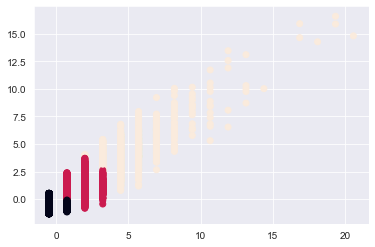

In [38]:
plt.scatter(eng['sessions_frequency'],eng['total'],c=eng['cluster'])
#plt.title(f'{x_col_name} clusters')

2.1.3

In [39]:
non_nomelized_engagement_metric= engagement_metric.copy()

In [40]:
Kmean = KMeans(n_clusters=3)
cluster =Kmean.fit_predict(non_nomelized_engagement_metric)
cluster

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
non_nomelized_engagement_metric['cluster']= cluster
non_nomelized_engagement_metric.head(20)

,sessions_frequency,sessions_duration,total,cluster
13107,17,"18,553,763,486.00","8,499.62",1
6394,17,"9,966,905,758.00","8,846.23",1
92486,15,"9,279,442,000.00","8,514.77",1
13451,18,"8,791,936,680.00","7,971.17",1
64825,13,"8,744,922,020.00","5,618.39",1
56896,9,"6,288,735,771.00","5,682.01",1
656,12,"6,287,767,483.00","4,976.20",1
50046,8,"5,659,736,773.00","3,856.23",1
65725,6,"5,649,885,358.00","2,600.52",1
92141,12,"5,321,673,794.00","7,132.37",1


In [42]:
#plot

In [43]:
clusters=non_nomelized_engagement_metric.groupby('cluster').agg({'sessions_frequency':{np.min,np.mean,np.sum,np.max},'sessions_duration':{np.min,np.mean,np.sum,np.max},'total':{np.min,np.mean,np.sum,np.max}})
clusters.columns=['Sessions_Minimum','Sessions_Average','Sessions_Total','Sessions_Maximum','Duration(s)_Minimum','Duration(s)_Average','Duration(s)_Total','Duration(s)_Maximum',
'Total_MB_Minimum','Total_MB_Average','Total_MB_Total','Total_MB_Maximum']

In [44]:
clusters

,Sessions_Minimum,Sessions_Average,Sessions_Total,Sessions_Maximum,Duration(s)_Minimum,Duration(s)_Average,Duration(s)_Total,Duration(s)_Maximum,Total_MB_Minimum,Total_MB_Average,Total_MB_Total,Total_MB_Maximum
cluster,,,,,,,,,,,,
0,1,1.20,109095,7,"7,142,988.00","101,935,957.97","9,262,716,628,827.00","238,020,235.00",33.25,595.69,"54,129,158.76","4,009.94"
1,1,6.38,1779,18,"1,351,623,258.00","2,316,555,997.27","646,319,123,238.00","18,553,763,486.00",177.01,"3,182.45","887,904.14","8,846.23"
2,1,2.46,37472,11,"238,030,613.00","373,993,377.69","5,686,569,307,730.00","1,344,507,306.00",52.13,"1,219.06","18,535,813.71","5,096.13"


2.1.4

In [45]:
tel.groupby(
   ['MSISDN/Number']
).agg(
    {
         'Social_media_total':sum,
         'Google_total':sum,
         'Email_total':sum,
         'Youtube_total':sum,
         'Netflix_total':sum,
         'Gaming_total':sum,
         'Other_total':sum,      
    }
)

,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total
MSISDN/Number,,,,,,,
"33,601,001,722.00",2.23,4.39,1.33,21.62,27.18,812.46,386.57
"33,601,001,754.00",2.66,5.33,3.31,12.43,11.22,119.75,281.71
"33,601,002,511.00",3.20,3.44,3.21,21.33,19.35,538.83,501.69
"33,601,007,832.00",0.28,9.68,2.28,6.98,1.94,391.13,35.28
"33,601,008,617.00",2.91,18.50,3.31,41.53,49.20,"1,314.80",804.80
...,...,...,...,...,...,...,...
"33,789,996,170.00",0.30,7.53,1.01,26.65,14.90,660.36,295.28
"33,789,997,247.00",0.50,5.43,2.51,19.85,8.53,437.00,211.12
"3,197,020,876,596.00",0.72,10.44,1.52,11.96,26.59,178.05,470.53


In [46]:
top10_socialmedia=tel.groupby('MSISDN/Number', as_index=False).agg({"Social_media_total": "sum"}).sort_values('Social_media_total', ascending= False)[:10]
top10_socialmedia

,MSISDN/Number,Social_media_total
13451,"33,626,320,676.00",43.37
92486,"33,760,536,639.00",39.78
36867,"33,659,725,664.00",35.41
6394,"33,614,892,860.00",28.29
13107,"33,625,779,332.00",27.14
64825,"33,667,163,239.00",24.25
105638,"33,786,323,068.00",23.97
70635,"33,669,068,942.00",23.80
656,"33,603,127,838.00",23.08
60067,"33,665,530,316.00",22.59


In [47]:
top10_google=tel.groupby('MSISDN/Number', as_index=False).agg({"Google_total": "sum"}).sort_values('Google_total', ascending= False)[:10]
top10_google

,MSISDN/Number,Google_total
13451,"33,626,320,676.00",152.19
13107,"33,625,779,332.00",142.31
6394,"33,614,892,860.00",127.97
92486,"33,760,536,639.00",123.22
36867,"33,659,725,664.00",116.52
105638,"33,786,323,068.00",110.25
75999,"33,675,877,202.00",109.86
64825,"33,667,163,239.00",105.03
94208,"33,761,268,199.00",97.09
85904,"33,698,756,430.00",91.94


In [48]:
top10_Email_total=tel.groupby('MSISDN/Number', as_index=False).agg({"Email_total": "sum"}).sort_values('Email_total', ascending= False)[:10]
top10_Email_total

,MSISDN/Number,Email_total
13451,"33,626,320,676.00",42.42
6394,"33,614,892,860.00",40.79
13107,"33,625,779,332.00",40.63
105638,"33,786,323,068.00",36.31
36867,"33,659,725,664.00",36.00
92486,"33,760,536,639.00",33.69
75999,"33,675,877,202.00",31.51
59816,"33,665,460,546.00",30.42
64825,"33,667,163,239.00",30.34
86045,"33,698,792,269.00",29.06


In [49]:
top10_Youtube_total=tel.groupby('MSISDN/Number', as_index=False).agg({"Youtube_total": "sum"}).sort_values('Youtube_total', ascending= False)[:10]
top10_Youtube_total

,MSISDN/Number,Youtube_total
13107,"33,625,779,332.00",452.96
92486,"33,760,536,639.00",396.29
6394,"33,614,892,860.00",394.37
13451,"33,626,320,676.00",374.48
75999,"33,675,877,202.00",317.41
64825,"33,667,163,239.00",315.23
13918,"33,627,080,969.00",308.79
92141,"33,760,413,819.00",303.17
86045,"33,698,792,269.00",302.66
656,"33,603,127,838.00",284.09


In [50]:
top10_Netflix_total=tel.groupby('MSISDN/Number', as_index=False).agg({"Netflix_total": "sum"}).sort_values('Netflix_total', ascending= False)[:10]
top10_Netflix_total

,MSISDN/Number,Netflix_total
36867,"33,659,725,664.00",399.52
6394,"33,614,892,860.00",361.40
13107,"33,625,779,332.00",356.98
92486,"33,760,536,639.00",334.64
13451,"33,626,320,676.00",328.73
92141,"33,760,413,819.00",318.35
64825,"33,667,163,239.00",313.94
75999,"33,675,877,202.00",309.09
105638,"33,786,323,068.00",305.94
94208,"33,761,268,199.00",292.09


In [51]:
top10_Gaming_total=tel.groupby('MSISDN/Number', as_index=False).agg({"Gaming_total": "sum"}).sort_values('Gaming_total', ascending= False)[:10]
top10_Gaming_total

,MSISDN/Number,Gaming_total
6394,"33,614,892,860.00","7,749.43"
92486,"33,760,536,639.00","7,461.05"
13107,"33,625,779,332.00","7,326.67"
75999,"33,675,877,202.00","6,970.57"
13451,"33,626,320,676.00","6,887.57"
36867,"33,659,725,664.00","6,725.56"
62746,"33,666,464,084.00","6,646.30"
92141,"33,760,413,819.00","6,268.62"
56977,"33,664,712,899.00","6,103.86"
86045,"33,698,792,269.00","5,753.74"


In [52]:
top10_Other_total=tel.groupby('MSISDN/Number', as_index=False).agg({"Other_total": "sum"}).sort_values('Other_total', ascending= False)[:10]
top10_Other_total


,MSISDN/Number,Other_total
13451,"33,626,320,676.00","8,167.88"
6394,"33,614,892,860.00","7,639.26"
75999,"33,675,877,202.00","6,798.52"
13107,"33,625,779,332.00","6,354.58"
656,"33,603,127,838.00","6,326.67"
36867,"33,659,725,664.00","6,317.42"
13861,"33,626,948,251.00","5,305.45"
13918,"33,627,080,969.00","5,117.79"
94208,"33,761,268,199.00","5,077.78"
30555,"33,658,361,927.00","5,013.65"


2.1.5

In [53]:
application_trafic = tel_qual[['Social_media_total','Google_total','Email_total','Youtube_total','Netflix_total','Gaming_total','Other_total']]
application_trafic

,Social_media_total,Google_total,Email_total,Youtube_total,Netflix_total,Gaming_total,Other_total
0,1.57,2.91,3.70,18.36,17.86,292.43,180.56
1,1.93,4.41,0.94,22.66,35.57,609.92,541.96
2,1.73,10.23,3.36,34.43,23.75,229.98,414.91
3,0.66,11.81,2.07,36.53,15.09,431.69,761.84
4,0.91,7.75,2.11,34.22,17.54,531.24,564.62
...,...,...,...,...,...,...,...
149995,0.99,1.27,2.26,24.55,29.62,797.16,336.27
149996,1.83,12.78,0.69,27.96,37.56,535.81,16.75
149997,2.35,4.42,2.12,22.17,22.64,631.63,714.64
149998,1.26,6.59,2.06,24.52,15.03,566.93,132.42


In [54]:
application_totals = application_trafic.sum(axis=0)
application_totals

Social_media_total      258,552.62
Google_total          1,111,500.76
Email_total             321,283.33
Youtube_total         3,226,856.43
Netflix_total         3,224,480.17
Gaming_total         60,883,817.79
Other_total          60,732,901.66
dtype: float64

In [55]:
social = pd.DataFrame(application_totals)
social

,0
Social_media_total,"258,552.62"
Google_total,"1,111,500.76"
Email_total,"321,283.33"
Youtube_total,"3,226,856.43"
Netflix_total,"3,224,480.17"
Gaming_total,"60,883,817.79"
Other_total,"60,732,901.66"


In [56]:
top3_social= social.sort_values(by = 0 , ascending= False)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Gaming_total'),
  Text(1, 0, 'Other_total'),
  Text(2, 0, 'Youtube_total'),
  Text(3, 0, 'Netflix_total'),
  Text(4, 0, 'Google_total'),
  Text(5, 0, 'Email_total'),
  Text(6, 0, 'Social_media_total')])

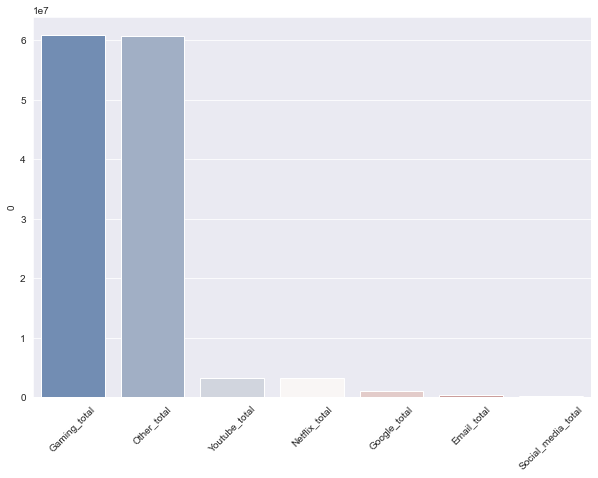

In [57]:
plt.figure(figsize=(10,7))
sns.barplot(x=top3_social.index,y=top3_social[0],palette='vlag')
plt.xticks(rotation =45)

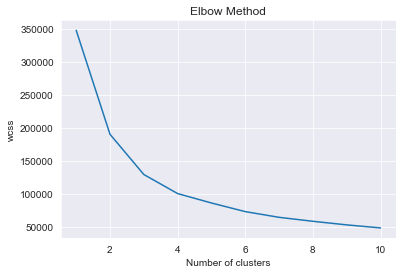

In [58]:
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(eng)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

choose 4 as the number of cluster